In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
sys.path.append("../../")
import data_loading as dl

from microfit import run_plotter as rp
from microfit import histogram as hist
from microfit import selections as sel
from microfit.run_plotter import RunHistPlotter
from microfit.histogram import Binning, MultiChannelBinning
import make_detsys as detsys

In [3]:
RUN = ["1"]

rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="bnb",
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
    blinded=True,
    enable_cache=True,
    numupresel=False,
    loadnumuvariables=False,
    use_bdt=True,
    load_numu_tki=False
)

Loading run 1


Loading detvar data for run 1 and variation cv
Loading detvar data for run 1 and variation lydown
LY Down uncertainties is not used in run 1, loading CV sample as a dummy
Loading detvar data for run 1 and variation wiremodthetayz
ZPBDT
ZP


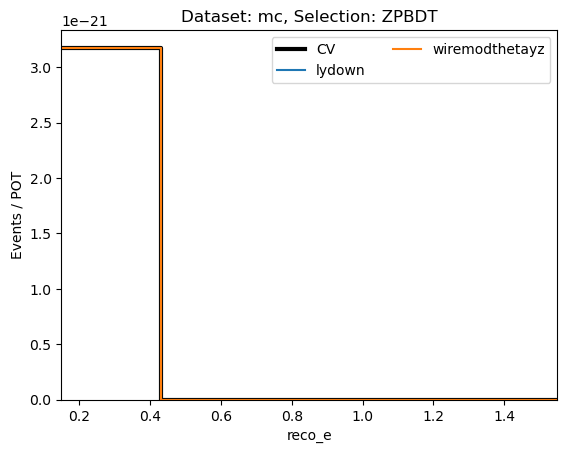

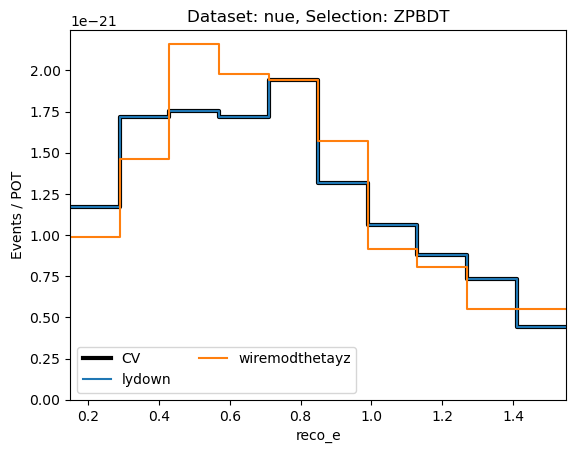

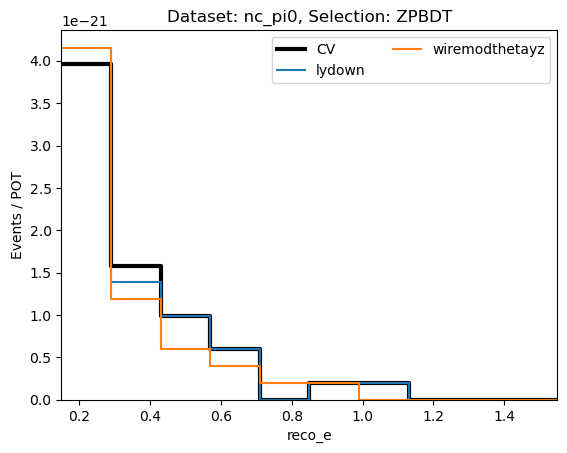

In [4]:
binning_def = ("reco_e", 10, (0.15, 1.55), "muon candidate reconstructed energy [GeV]")

np_binning = Binning.from_config(*binning_def)
np_binning.label = "ZP"
selection = "ZPBDT"
preselection = "ZP"

np_detvars = detsys.make_variations(
    RUN,
    "bnb",
    selection,
    preselection,
    np_binning,
    make_plots=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
    blinded=True,
    enable_cache=True,
    numupresel=False,
    loadnumuvariables=False,
    use_bdt=True,
    load_numu_tki=False
)

In [15]:
extra_cov = np.zeros(shape=(10,10))
np.fill_diagonal(extra_cov,1.0)

signal_generator_np = hist.RunHistGenerator(
    rundata,
    np_binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data=np_detvars,
    extra_mc_covariance=extra_cov
)

Adding fractional covariance matrix
[0.78111601 0.39055801 0.39055801 0.260372   0.         0.130186
 0.         0.         0.         0.        ]
Adding fractional covariance matrix
[0.260372   0.         0.130186   0.16567262 0.         0.
 0.15014877 0.         0.         0.        ]
Adding fractional covariance matrix
[0.17417754 0.37460753 0.45294002 0.35712706 0.39482117 0.328842
 0.34048291 0.15903717 0.14248653 0.08751495]
Adding fractional covariance matrix
[0.3089797  0.19117779 0.100683   0.03087283 0.00558285 0.00063717
 0.         0.         0.         0.        ]
Adding covariance matrix
Adding covariance matrix
Adding covariance matrix
Adding covariance matrix
Adding covariance matrix
Adding fractional covariance matrix
[1.52464526 0.95634332 1.07436702 0.81404451 0.40040402 0.45966516
 0.49063168 0.15903717 0.14248653 0.08751495]


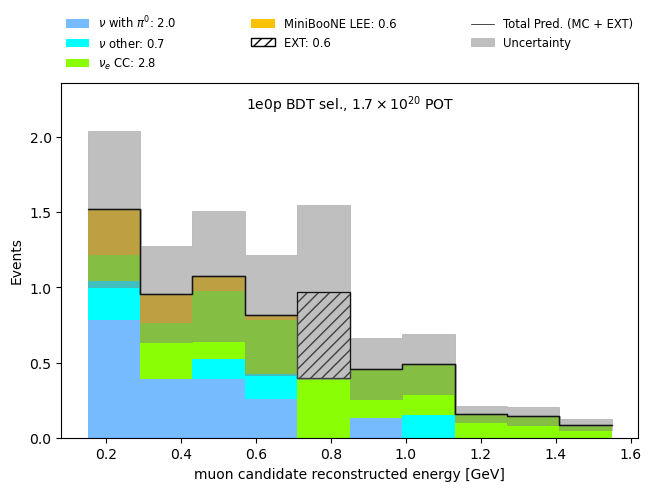

In [16]:
ax = RunHistPlotter(signal_generator_np).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="NPBDT",add_precomputed_detsys=True,show_chi_square=False
)